# Hotel reservation analysis

**************

## 1. Setup

Loading all neccessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Loading and clearing data

In [7]:
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

In [8]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Data Dictionary: Hotel Booking Demand

| **Column Name**                   | **Description**                                                                                                                                                                     |
|-----------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `hotel`                           | Type of hotel: H1 = Resort Hotel, H2 = City Hotel                                                                                                                                   |
| `is_canceled`                     | Indicates whether the booking was canceled: 1 = yes, 0 = no                                                                                                                        |
| `lead_time`                       | Number of days between the booking date and the arrival date                                                                                                                        |
| `arrival_date_year`               | Year of arrival date                                                                                                                                                                |
| `arrival_date_month`              | Month of arrival date                                                                                                                                                               |
| `arrival_date_week_number`        | Week number of the year for the arrival date                                                                                                                                        |
| `arrival_date_day_of_month`       | Day of the month of arrival                                                                                                                                                         |
| `stays_in_weekend_nights`         | Number of weekend nights (Saturday and Sunday) the guest booked or stayed at the hotel                                                                                             |
| `stays_in_week_nights`            | Number of weeknights (Monday to Friday) the guest booked or stayed at the hotel                                                                                                     |
| `adults`                          | Number of adults booked for the stay                                                                                                                                                |
| `children`                        | Number of children booked for the stay                                                                                                                                              |
| `babies`                          | Number of babies booked for the stay                                                                                                                                                |
| `meal`                            | Type of meal booked: Undefined/SC = no meal package, BB = Bed & Breakfast, HB = Half Board (breakfast + one meal), FB = Full Board (breakfast, lunch, and dinner)                    |
| `country`                         | Country of origin, represented in ISO 3166-1 alpha-3 format                                                                                                                         |
| `market_segment`                  | Market segment designation: "TA" = Travel Agents, "TO" = Tour Operators                                                                                                             |
| `distribution_channel`            | Booking distribution channel: "TA" = Travel Agents, "TO" = Tour Operators                                                                                                           |
| `is_repeated_guest`               | Indicates if the booking is from a repeated guest: 1 = yes, 0 = no                                                                                                                 |
| `previous_cancellations`          | Number of previous bookings canceled by the customer                                                                                                                                |
| `previous_bookings_not_canceled`  | Number of previous bookings not canceled by the customer                                                                                                                            |
| `reserved_room_type`              | Code of the room type reserved (anonymized)                                                                                                                                        |
| `assigned_room_type`              | Code of the room type assigned (can differ from reserved type due to hotel operations or guest requests, anonymized)                                                               |
| `booking_changes`                 | Number of changes made to the booking between creation and check-in/cancellation                                                                                                   |
| `deposit_type`                    | Type of deposit made: No Deposit = no deposit, Non Refund = full cost deposit, Refundable = partial deposit                                                                         |
| `agent`                           | ID of the travel agency that made the booking (anonymized)                                                                                                                         |
| `company`                         | ID of the company/entity responsible for the booking or payment (anonymized)                                                                                                       |
| `days_in_waiting_list`            | Number of days the booking was on the waiting list before confirmation                                                                                                              |
| `customer_type`                   | Type of booking: Contract = allotment/contract, Group = group booking, Transient = individual, not part of a group or contract, Transient-party = individual, linked to another transient booking |
| `adr`                             | Average Daily Rate, calculated as the total lodging revenue divided by the number of staying nights                                                                                |
| `required_car_parking_spaces`     | Number of car parking spaces required by the guest                                                                                                                                  |
| `total_of_special_requests`       | Number of special requests made by the guest (e.g., twin bed, high floor)                                                                                                           |
| `reservation_status`              | Final status of the booking: Canceled, Check-Out (guest departed), No-Show (guest did not check in)                                                                                  |
| `reservation_status_date`         | Date when the reservation status was last updated                                                                                                                                   |


***************

## 2. Data Cleaning

In [9]:
# check for duplicates
df.duplicated().any()

True

In [10]:
df[df.duplicated(keep='first')]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [11]:
# drop dupliactes
df = df.drop_duplicates(keep='last')

In [12]:
df.duplicated().any()

False

In [13]:
df.shape

(87396, 32)

In [14]:
# check for missing values
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [15]:
# check values for country columns (PRT - Portugal has most records)
df['country'].value_counts()

country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

Since the value 'PRT' is the most frequently occurring value (the mode) in the 'country' column, I decided to fill in the missing values with it.

In [16]:
df['country'].fillna('PRT',inplace=True)

<ipython-input-16-c0bb89b0057d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('PRT',inplace=True)
<ipython-input-16-c0bb89b0057d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'].fillna('PRT',inplace=True)


In [17]:
# next columns missing value check
df.loc[df['children'].isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [18]:
df['children'].fillna(0,inplace=True)

<ipython-input-18-833de8cbfd38>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0,inplace=True)
<ipython-input-18-833de8cbfd38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'].fillna(0,inplace=True)


Since the data indicates that in all 4 rows where the number of children is null, only adults were present, I assume the number of children was 0, and I am filling in the missing values accordingly.

Since the columns `agent` and `country` represent significant missing data in the dataset, they will be entirely removed.

In [19]:
df.drop(['agent','company'],axis=1,inplace=True)

<ipython-input-19-1cdf4c67e835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['agent','company'],axis=1,inplace=True)


Check for ratio in `is_canceled` column

In [20]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.725102
1    0.274898
Name: proportion, dtype: float64

The dataset contains more bookings that were completed than those that were canceled.

In [21]:
# reseting index due to drop
df.reset_index(inplace=True, drop=True)

In [22]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
87392,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
87393,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
87394,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


*********************************

## 3. Exploatory Data Analysis

**I will try to dive deeper into the dataset regarding**:
1. Bookings and cancellations.
2. Guest types and their preferences
3. Seasonality and trends
4. Price and Payments
5. Booking Channels and Market Segments

### 1. Reservations and cancelations

**What is the percentage of canceled reservations for each hotel type?**

Text(0.5, 1.0, 'Percentage of canceled reservation')

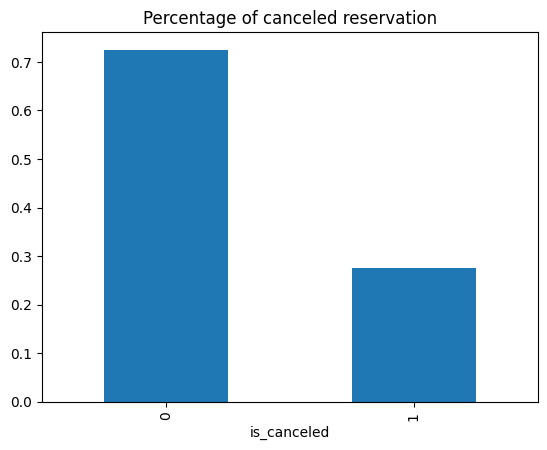

In [23]:
df['is_canceled'].value_counts(normalize=True).plot(kind='bar')
plt.title('Percentage of canceled reservation')

Text(0.5, 1.0, 'Percentage of canceled reservation of each hotel type')

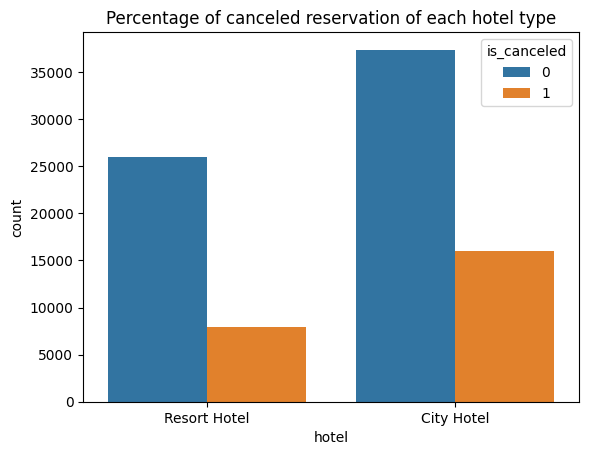

In [24]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Percentage of canceled reservation of each hotel type')

**Does the length of `lead_time` (the time between booking and arrival) affect reservation cancellations?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


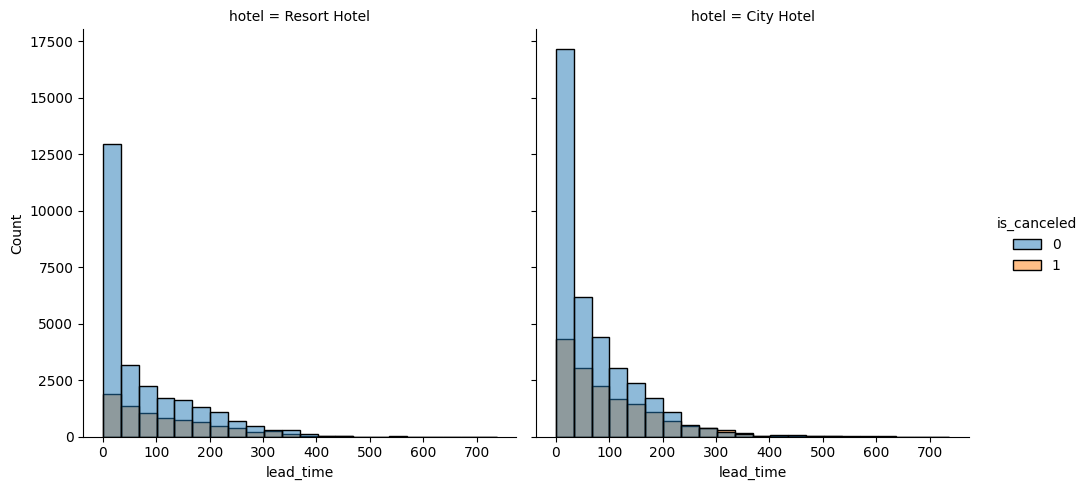

In [25]:
sns.displot(data=df, bins=22, x='lead_time', hue='is_canceled', col='hotel')

**A large peak at the beginning of the chart suggests that customers are making last-minute bookings.**

Text(0.5, 1.0, 'Reservation status including lead_time depending on hotel type')

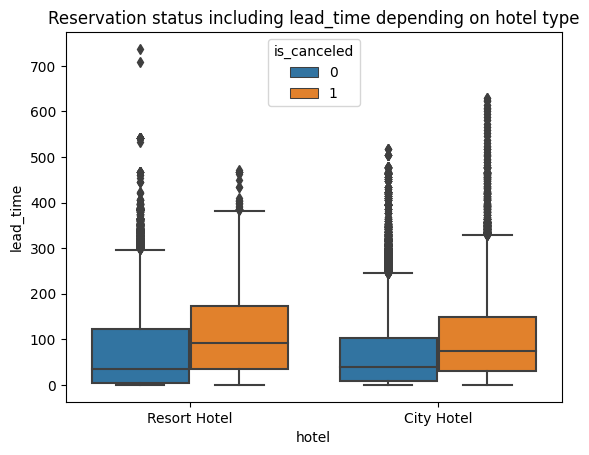

In [26]:
sns.boxplot(data=df, x='hotel', y='lead_time', hue='is_canceled')
plt.title('Reservation status including lead_time depending on hotel type')

**Customers booked their stay in city hotels with a longer lead time, and with a shorter lead time in resort hotels.**

**Does the number of `booking_changes` correlate with the likelihood of cancellation?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='booking_changes', ylabel='Count'>

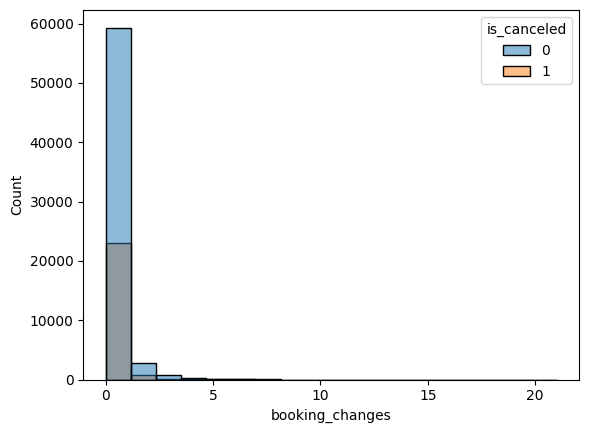

In [27]:
sns.histplot(data=df, x='booking_changes', hue='is_canceled')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


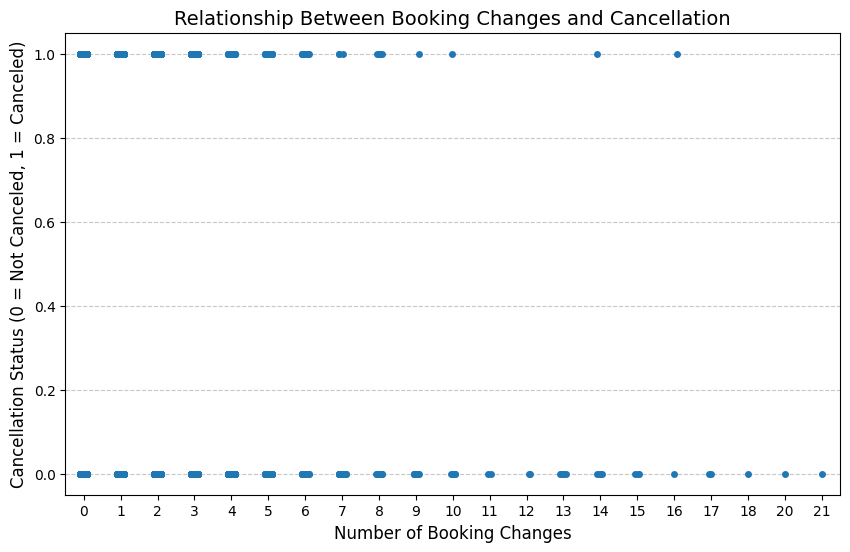

In [28]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df, 
    x="booking_changes", 
    y="is_canceled", 
    jitter=True, 
)

plt.title("Relationship Between Booking Changes and Cancellation", fontsize=14)
plt.xlabel("Number of Booking Changes", fontsize=12)
plt.ylabel("Cancellation Status (0 = Not Canceled, 1 = Canceled)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

************************

### 2. Guest types and their preferences

**What impact do the number of adults, children, and infants in a reservation have on cancellations?**

<Axes: >

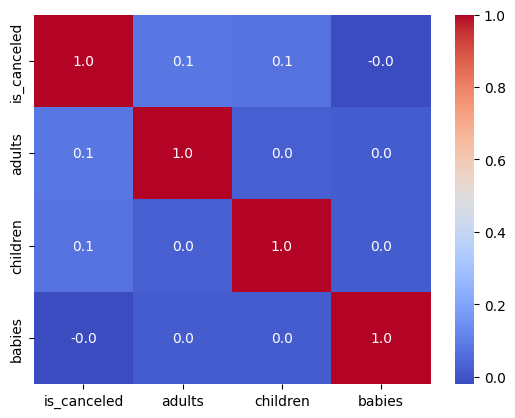

In [29]:
guests_subset = df[['is_canceled', 'adults' ,'children', 'babies']]
sns.heatmap(guests_subset.corr(), annot=True, fmt=".1f", cmap="coolwarm")

**How does the number of special requests `total_of_special_requests` affect the reservation status?**

Text(0.5, 1.0, 'Number of special requests with cancelation status')

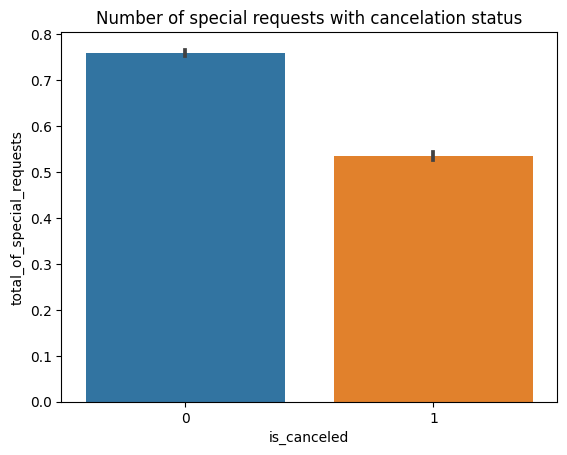

In [30]:
sns.barplot(data=df, x='is_canceled', y='total_of_special_requests')
plt.title('Number of special requests with cancelation status')

**Do repeat guests `is_repeated_guest` cancel reservations less frequently than new guests?**

In [31]:
data = df[['is_repeated_guest', 'is_canceled']].value_counts(normalize=True)

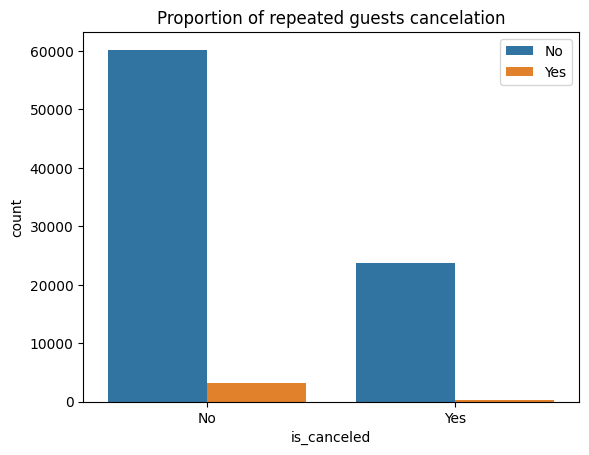

In [32]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='is_canceled', hue='is_repeated_guest')
plt.title('Proportion of repeated guests cancelation')
ax.set_xticklabels(['No', 'Yes'])
ax.legend(['No', 'Yes'])

******************

### 3. Seasonality and trends

Let’s now take a look at the arrival dates to the hotels. We can look for interesting insights here. Analyzing this in the context of booking cancellations might be useful for identifying seasonality and time patterns.

To make it easier to determine the season in which reservations are made, we can create a new column called `seasons` and assign a season based on the reservation date. Here's how we can define the seasons:

In [33]:
def assign_season(week_number):
    if week_number <= 12:
        return 'Winter'
    elif 13 <= week_number <= 25:
        return 'Spring'
    elif 26 <= week_number <= 38:
        return 'Summer'
    elif 39 <= week_number <= 50:
        return 'Autumn'
    else:
        return 'Winter'

In [34]:
df['season'] = df['arrival_date_week_number'].apply(assign_season)

<ipython-input-34-1e2fd59f19cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['arrival_date_week_number'].apply(assign_season)


In [35]:
df['season'].value_counts()

season
Summer    27641
Spring    24061
Winter    19247
Autumn    16447
Name: count, dtype: int64

Text(0.5, 1.0, 'Reservation cancelation based on season')

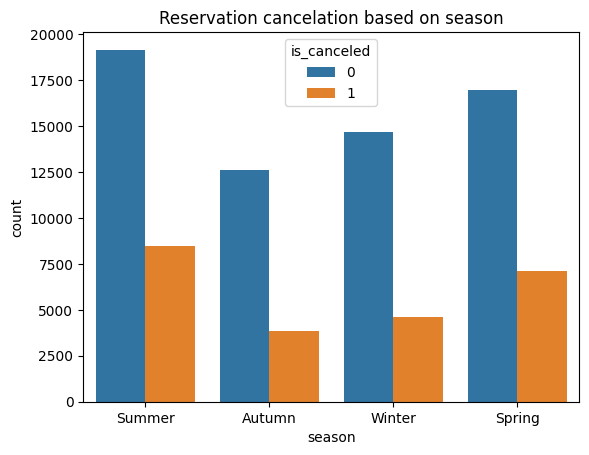

In [36]:
sns.countplot(data=df, x='season', hue='is_canceled')
plt.title('Reservation cancelation based on season')

As we can observe, the highest number of bookings occurs during the summer and spring seasons, with a similar pattern for booking cancellations. Interestingly, the lowest number of cancellations happens during the winter season, which, as we know, includes the holiday period.

In [37]:
df['arrival_date_month_dt'] = pd.Categorical(df['arrival_date_month'],
                                            categories=["January", "February", "March", "April", "May", "June", "July",
                                         "August", "September", "October", "November", "December"],
                                            ordered=True)

<ipython-input-37-c84a5d07dbd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['arrival_date_month_dt'] = pd.Categorical(df['arrival_date_month'],


In [38]:
arrival_month = df.groupby(['arrival_date_month_dt', 'is_canceled'])['is_canceled'].count().unstack()

<ipython-input-38-f6daa4358e1f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arrival_month = df.groupby(['arrival_date_month_dt', 'is_canceled'])['is_canceled'].count().unstack()


**Which months of the year have the most cancellations?**

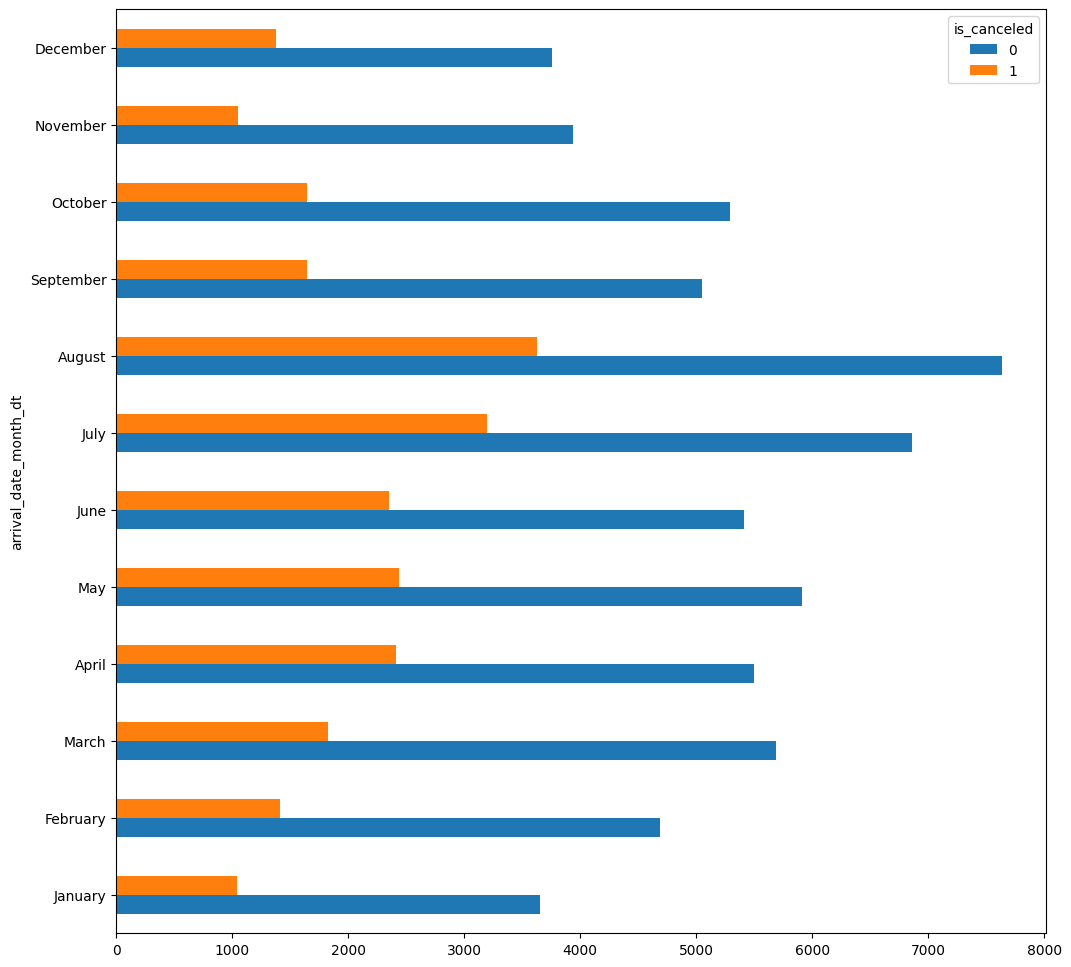

In [39]:
arrival_month.plot(kind='barh', figsize=[12,12])
plt.show()

**Does the number of cancellations vary depending on the day of the week?**

In [40]:
data = df.groupby('is_canceled')[['stays_in_weekend_nights','stays_in_week_nights']].mean()
data

,stays_in_weekend_nights,stays_in_week_nights
is_canceled,,
0,0.967020,2.520538
1,1.106139,2.901977


Text(0.5, 1.0, 'Proportion of canelaction during week days or weekends')

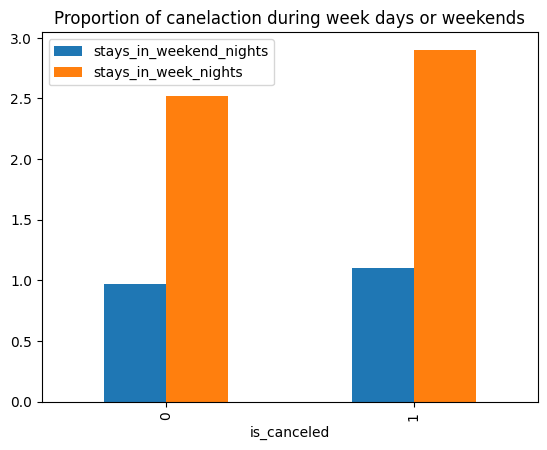

In [41]:
data.plot(kind='bar')
plt.title('Proportion of canelaction during week days or weekends')

**What is the relationship between the week of the year (arrival_date_week_number) and the number of cancellations?**

In [42]:
pivot_table = df[df['is_canceled'] == 1].pivot_table(
    index='arrival_date_week_number',
    columns='arrival_date_month_dt',
    aggfunc='size',
    fill_value=0
)

<ipython-input-42-d33da768195d>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df[df['is_canceled'] == 1].pivot_table(


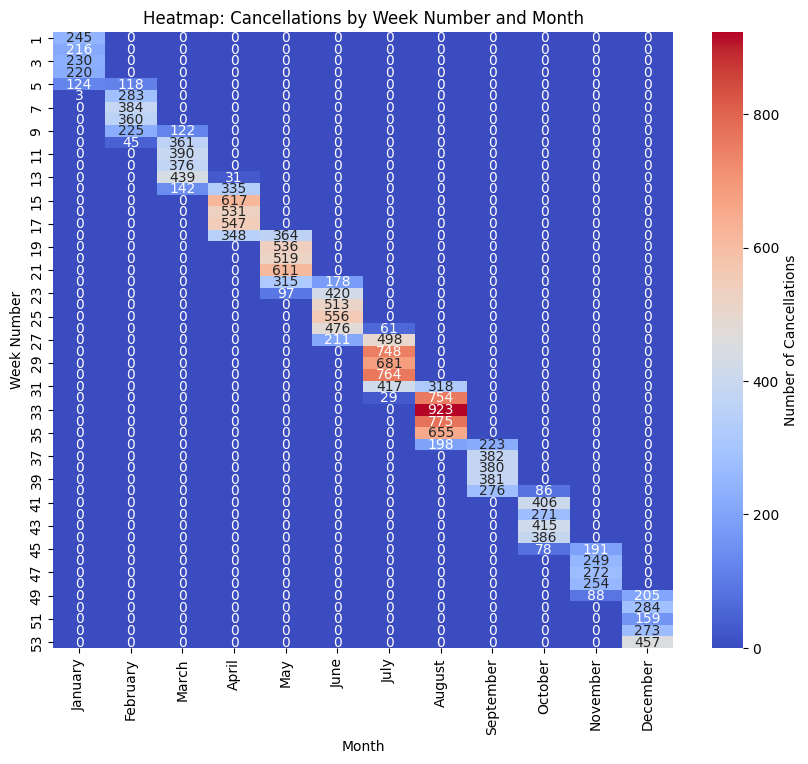

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Number of Cancellations'})
plt.title('Heatmap: Cancellations by Week Number and Month')
plt.xlabel('Month')
plt.ylabel('Week Number')
plt.show()

********************

### 4.Price and Payments

**Does the average daily rate (ADR) affect the cancellation of bookings?**

In [44]:
df.groupby('is_canceled')['adr'].mean()

is_canceled
0    102.001961
1    117.772476
Name: adr, dtype: float64

<Axes: xlabel='hotel', ylabel='adr'>

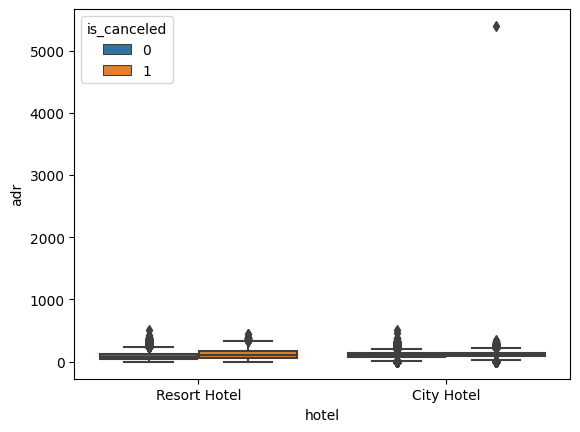

In [45]:
sns.boxplot(data=df, x='hotel', y='adr', hue='is_canceled')

In [46]:
df['adr'].sort_values(ascending=False)

38740    5400.00
80728     510.00
11564     508.00
74455     451.50
9894      450.00
          ...   
55310       0.00
2299        0.00
2298        0.00
0           0.00
11494      -6.38
Name: adr, Length: 87396, dtype: float64

In [47]:
df.drop(df.loc[df['adr']==df['adr'].max()].index[0], inplace=True)

<ipython-input-47-39f3d311c469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.loc[df['adr']==df['adr'].max()].index[0], inplace=True)


<Axes: xlabel='hotel', ylabel='adr'>

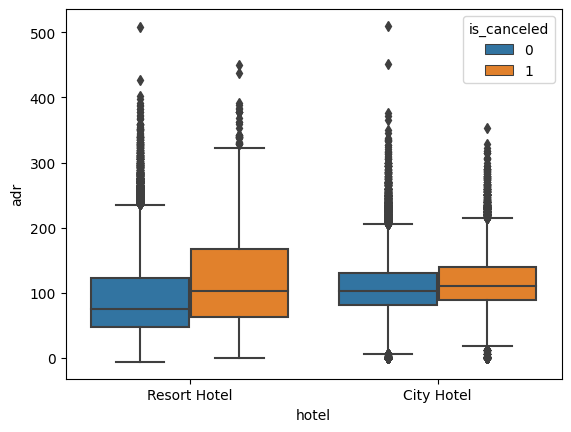

In [48]:
sns.boxplot(data=df, x='hotel', y='adr', hue='is_canceled')

**How does ADR look throughout the entire year?**

In [49]:
data = df.groupby('arrival_date_month_dt')['adr'].mean()
data

<ipython-input-49-e6c46eb8a82a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby('arrival_date_month_dt')['adr'].mean()


arrival_date_month_dt
January       70.050742
February      74.692033
March         80.901538
April        103.612589
May          111.195703
June         119.750120
July         135.542014
August       150.876120
September    112.081263
October       90.152518
November      72.754460
December      81.450226
Name: adr, dtype: float64

Text(0.5, 1.0, 'ADR year mean')

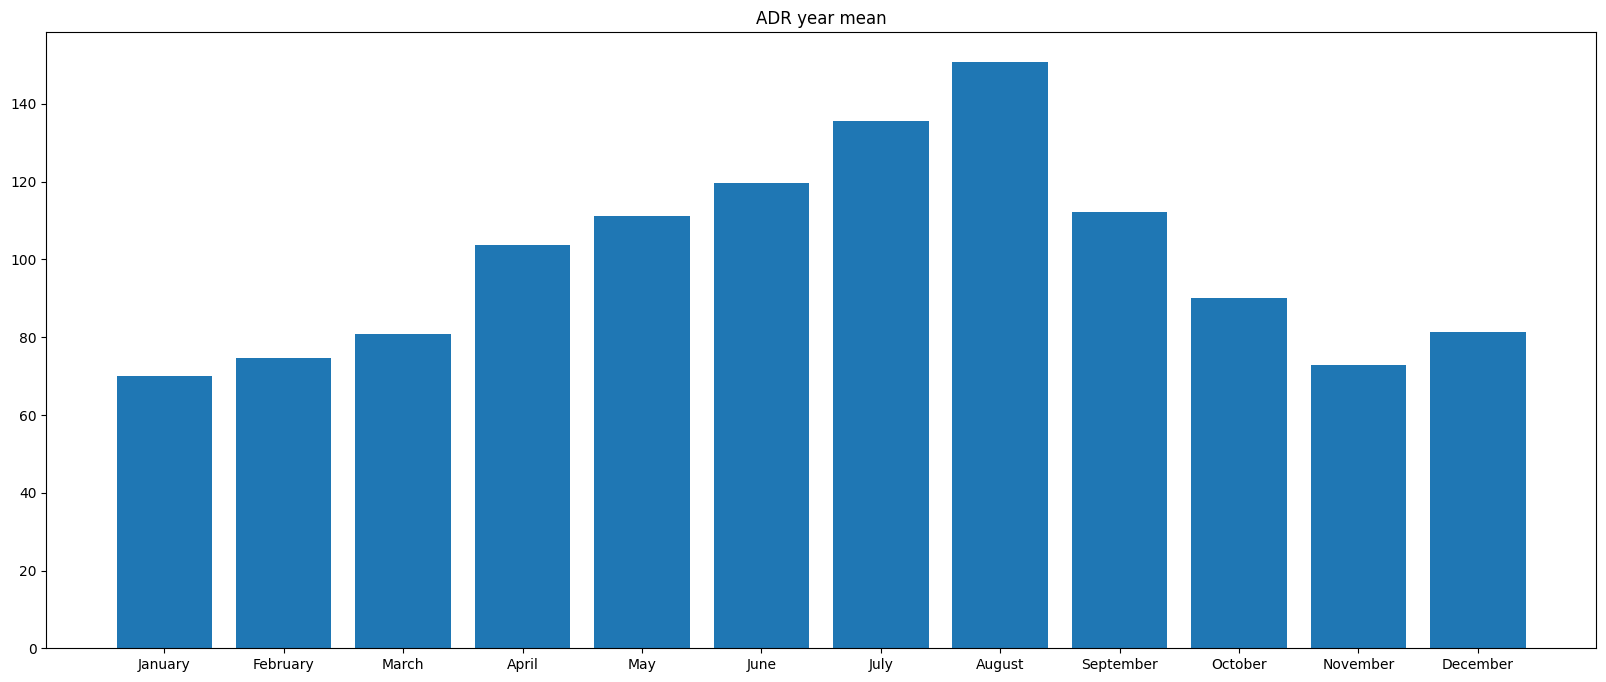

In [50]:
plt.figure(figsize=(20, 8))
plt.bar(x=list(data.index), height=data.values)
plt.title('ADR year mean')

**Which deposit methods `deposit_type` most commonly result in cancellations?**


This variable can assume three categories:
* No Deposit – no deposit was made
* Non Refund – a deposit was made in the value of the total stay cost
* Refundable – a deposit was made with a value under the total cost of stay.

<Axes: xlabel='deposit_type', ylabel='count'>

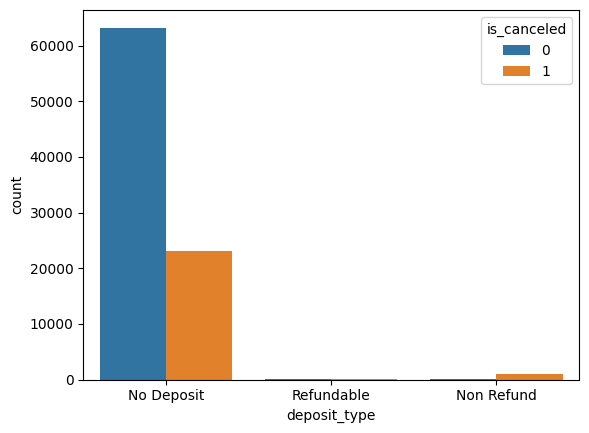

In [51]:
sns.countplot(x='deposit_type',data=df,hue='is_canceled')

*****************

### 5. Booking Channels and Market Segments

**Which distribution channels have the highest cancellation rate?**

In [52]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        69140
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: count, dtype: int64

In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [53]:
data = df['distribution_channel'].value_counts(normalize=True)
data

distribution_channel
TA/TO        0.791121
Direct       0.148613
Corporate    0.058138
GDS          0.002071
Undefined    0.000057
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7b8442f6e950>,
 [Text(-0.8715389680822061, 0.6711332409545839, 'TA/TO'),
  Text(0.7296545653103623, -0.8231671855229328, 'Direct'),
  Text(1.0789346124480015, -0.21424309104771855, 'Corporate'),
  Text(1.099974072464494, -0.007552476804081949, 'GDS'),
  Text(1.0999999822215507, -0.00019776902766608292, 'Undefined')],
 [Text(-0.4753848916812033, 0.36607267688431844, '79%'),
  Text(0.39799339926019756, -0.4490002830125087, '15%'),
  Text(0.5885097886080007, -0.1168598678442101, '6%'),
  Text(0.5999858577079058, -0.004119532802226517, '0%'),
  Text(0.5999999903026639, -0.00010787401509059067, '0%')])

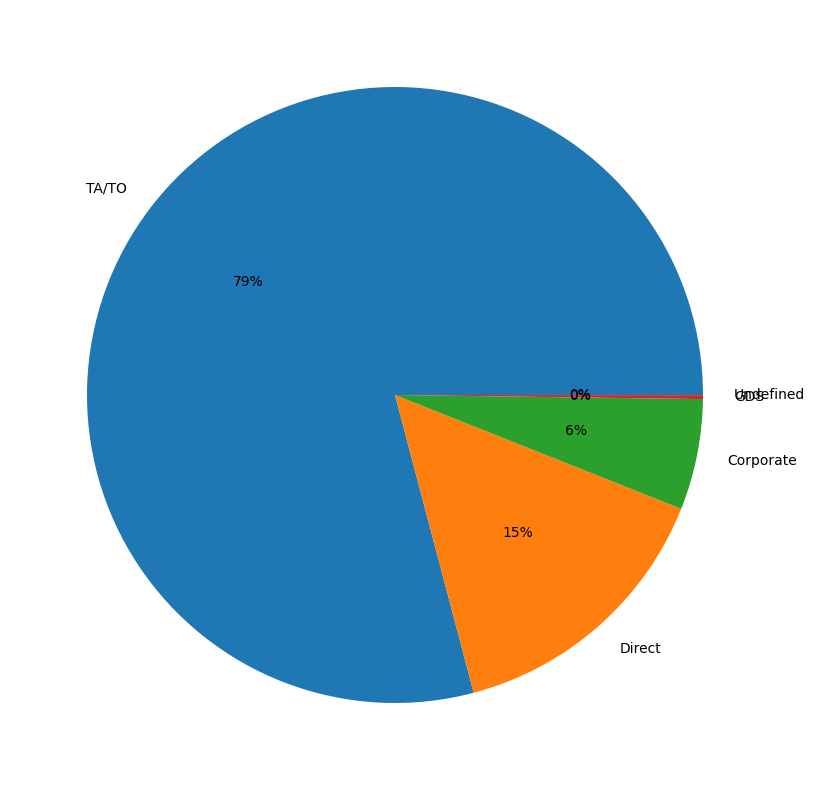

In [54]:
plt.figure(figsize=(10,10))
plt.pie(x=data, labels=list(data.keys()), autopct='%.0f%%')

Text(0.5, 1.0, 'Cancelation based on distribution channel')

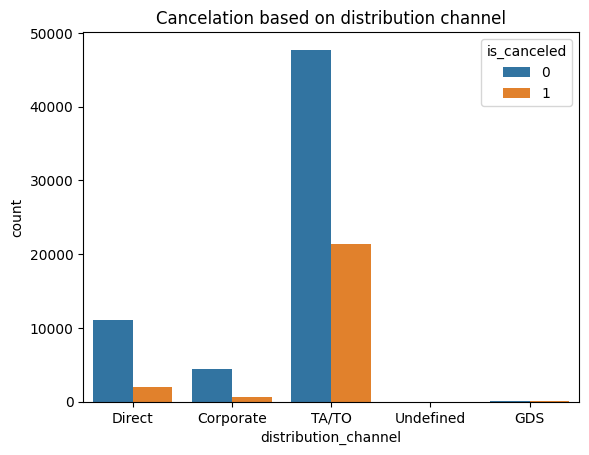

In [55]:
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')
plt.title('Cancelation based on distribution channel')

**Does the market segment affect the cancellation risk?**

In [56]:
data = df['market_segment'].value_counts(normalize=True)
data

market_segment
Online TA        0.590629
Offline TA/TO    0.158911
Direct           0.135065
Groups           0.056548
Corporate        0.048195
Complementary    0.008032
Aviation         0.002597
Undefined        0.000023
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7b8442e6d2d0>,
 [Text(-0.30897612391990475, 1.0557148075344174, 'Online TA'),
  Text(-0.5294196741400959, -0.9642171999261343, 'Offline TA/TO'),
  Text(0.44996748521876395, -1.0037575714513447, 'Direct'),
  Text(0.9392676429902878, -0.5725175061353753, 'Groups'),
  Text(1.0738836063581179, -0.23827295271449356, 'Corporate'),
  Text(1.0990438095887691, -0.04585525710979817, 'Complementary'),
  Text(1.0999620753857375, -0.009134150923934017, 'Aviation'),
  Text(1.0999999971492649, -7.919354323256142e-05, 'Undefined')],
 [Text(-0.16853243122903894, 0.5758444404733185, '59%'),
  Text(-0.2887743677127796, -0.5259366545051641, '16%'),
  Text(0.24543681011932578, -0.5475041298825516, '14%'),
  Text(0.5123278052674296, -0.312282276073841, '6%'),
  Text(0.5857546943771551, -0.1299670651169965, '5%'),
  Text(0.599478441593874, -0.02501195842352627, '1%'),
  Text(0.5999793138467658, -0.0049822641403276455, '0%'),
  Text(0.5999999984450536, -4.319647812685167e-05, 

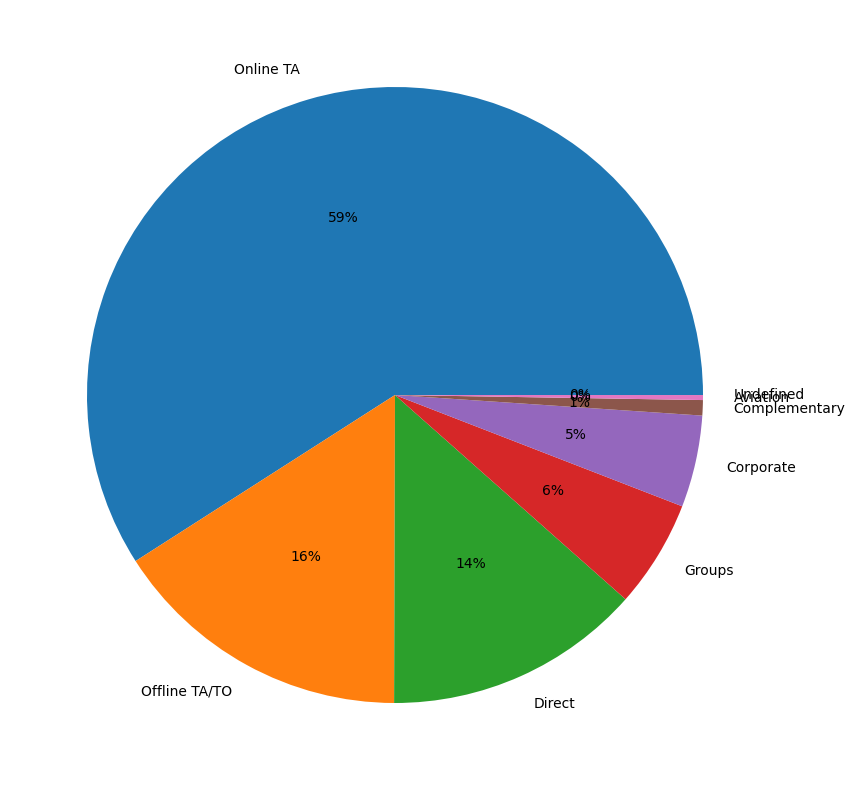

In [57]:
plt.figure(figsize=(10,10))
plt.pie(x=data, labels=list(data.keys()), autopct='%.0f%%')

******************************

## 4. Statistical testing

I will try to conduct basic statistical tests to examine the relationships between the variables, to better understand the factors influencing customer decisions

**********************

### 1.Tests related to booking cancellations `is_canceled`.

Using the Chi-Square test, I'll check if there is a significant relationship between categorical variables and booking cancellations.

In [58]:
from scipy.stats import chi2_contingency
def perform_chi_square_test(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Interpreting the result
    if p < 0.5:
        significant = 'We reject null hypothesis'
    else:
        significant = 'We assume null hypothesis'
    return chi2, p, significant

* H₀ (Null Hypothesis): The type of hotel (City Hotel vs. Resort Hotel) has no effect on the probability of reservation cancellation.
* H₁ (Alternative Hypothesis): The type of hotel affects the probability of reservation cancellation.

In [59]:
perform_chi_square_test(df, 'hotel', 'is_canceled')

(447.48988044216605, 2.5374086212927956e-99, 'We reject null hypothesis')

* H₀ (Null Hypothesis): The type of deposit has no effect on the probability of reservation cancellation.
* H₁ (Alternative Hypothesis): The type of deposit affects the probability of reservation cancellation.

In [60]:
perform_chi_square_test(df, 'deposit_type', 'is_canceled')

(2378.4173940380247, 0.0, 'We reject null hypothesis')

* H₀ (Null Hypothesis): The type of cutomer has no effect on the probability of reservation cancellation.
* H₁ (Alternative Hypothesis): The type of customer affects the probability of reservation cancellation.

In [61]:
perform_chi_square_test(df, 'customer_type', 'is_canceled')

(1411.041030668677, 1.1839971581657868e-305, 'We reject null hypothesis')

The Student's t-test will allow for a comparison of the mean values of numerical variables between groups (e.g., canceled vs. not canceled).

In [62]:
from scipy.stats import mannwhitneyu

lead_time_canceled = df[df['is_canceled']==1]['lead_time']
lead_time_not_canceled = df[df['is_canceled']==0]['lead_time']

t_stat, p_value = mannwhitneyu(lead_time_canceled, lead_time_not_canceled)

print(f'T-statistic: {t_stat:}')
print(f'P-value: {p_value:}')

alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject null hypthesis: lead_time drastically differs among groups.")
else:
    print("No reason to reject null hypthesis: lead_time does not differ much among groups.")

T-statistic: 983985649.5
P-value: 0.0
Reject null hypthesis: lead_time drastically differs among groups.


************

## 5. Modeling 

* Setting up df for trainig
* Creating train and test set with `train_test_split`
* Using classification models to predict reservation cancelation

In [63]:
# dropping unnecessary columns
df = df.drop(['country', 'assigned_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date_month_dt'], axis=1)

In [64]:
# encoding categorical variables
df = pd.concat([df,
                 pd.get_dummies(df['meal'], drop_first=True),
                 pd.get_dummies(df['deposit_type'], drop_first=True),
                 pd.get_dummies(df['reserved_room_type'], drop_first=True),
                 pd.get_dummies(df['hotel'], drop_first=True), 
                 pd.get_dummies(df['arrival_date_month'], drop_first=True), 
                 pd.get_dummies(df['market_segment'], drop_first=True),
                 pd.get_dummies(df['distribution_channel'], drop_first=True),
                 pd.get_dummies(df['customer_type'], drop_first=True),
                 pd.get_dummies(df['season'], drop_first=True)
                 ], axis=1)
df = df.drop(['hotel','meal', 'reserved_room_type','deposit_type', 'arrival_date_month','market_segment','distribution_channel','customer_type', 'season'], axis=1)

In [65]:
pd.set_option("display.max_columns", df.shape[0])

In [66]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,FB,HB,SC,Undefined,Non Refund,Refundable,B,C,D,E,F,G,H,L,P,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Direct,GDS,TA/TO,Undefined,Group,Transient,Transient-Party,Spring,Summer,Winter
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False
87392,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False
87393,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False
87394,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False


In [67]:
X = df.drop(columns='is_canceled')
X

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,FB,HB,SC,Undefined,Non Refund,Refundable,B,C,D,E,F,G,H,L,P,Resort Hotel,August,December,February,January,July,June,March,May,November,October,September,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined,Direct,GDS,TA/TO,Undefined,Group,Transient,Transient-Party,Spring,Summer,Winter
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False
87392,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False
87393,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False
87394,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False


In [68]:
y = df['is_canceled']
y

0        0
1        0
2        0
3        0
4        0
        ..
87391    0
87392    0
87393    0
87394    0
87395    0
Name: is_canceled, Length: 87395, dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [70]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [71]:
# sacling X
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[-0.6488005 , -0.29798016,  1.47062527, ..., -0.61167879,
        -0.685801  , -0.5269908 ],
       [-0.91578208,  1.1559208 , -1.2453017 , ..., -0.61167879,
        -0.685801  ,  1.89756635],
       [-0.84613471, -0.29798016, -1.46551199, ..., -0.61167879,
        -0.685801  ,  1.89756635],
       ...,
       [-0.59076103, -0.29798016,  1.39722184, ..., -0.61167879,
        -0.685801  , -0.5269908 ],
       [ 1.57991526,  1.1559208 , -0.21765366, ...,  1.63484498,
        -0.685801  , -0.5269908 ],
       [ 1.04595211,  1.1559208 ,  0.07596007, ..., -0.61167879,
         1.45814893, -0.5269908 ]])

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [73]:
model_accuracy_results = {}

# Function for calculating accuracy from confusion matrix
from sklearn.metrics import confusion_matrix
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    print("Model accuracy: ")
    print(accuracy)
    result = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(result)
    result1 = classification_report(y_test, y_pred)
    print("Classification Report:",)
    print (result1)
    return accuracy

In [81]:
clf = LogisticRegression(max_iter=400)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

model_accuracy_results['LogisticRegression'] = model_accuracy(y_test, y_pred)

Model accuracy: 
78.98
Confusion Matrix:
[[14856  1022]
 [ 3570  2401]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     15878
           1       0.70      0.40      0.51      5971

    accuracy                           0.79     21849
   macro avg       0.75      0.67      0.69     21849
weighted avg       0.78      0.79      0.77     21849



The Logistic Regression model achieves 78.98% accuracy but struggles with predicting cancellations, as shown by the low recall (40%) and moderate F1-score (0.51). While it performs well for "not canceled" predictions, further improvements are needed to better identify cancellations, particularly by addressing class imbalance and exploring advanced modeling techniques.

In [82]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

model_accuracy_results['KNeighborsClassifier'] = model_accuracy(y_test, y_pred)

Model accuracy: 
77.13
Confusion Matrix:
[[14087  1791]
 [ 3205  2766]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     15878
           1       0.61      0.46      0.53      5971

    accuracy                           0.77     21849
   macro avg       0.71      0.68      0.69     21849
weighted avg       0.76      0.77      0.76     21849



The KNeighborsClassifier achieves 77.13% accuracy but struggles with predicting cancellations, as shown by the low recall (46%) and moderate F1-score (0.53). While it performs well for "not canceled" predictions, further improvements are needed to better identify cancellations, particularly by addressing class imbalance and exploring advanced modeling techniques.

In [83]:
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)


model_accuracy_results['RandomForestClassifier'] = model_accuracy(y_test, y_pred)


Model accuracy: 
81.24
Confusion Matrix:
[[14583  1295]
 [ 2804  3167]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15878
           1       0.71      0.53      0.61      5971

    accuracy                           0.81     21849
   macro avg       0.77      0.72      0.74     21849
weighted avg       0.80      0.81      0.80     21849



The RandomForestClassifier achieves 81.24% accuracy and demonstrates strong performance for predicting "not canceled" with an F1-score of 0.88. However, it still struggles slightly with predicting cancellations, as shown by the recall of 53% and F1-score of 0.61. Further improvements, such as addressing class imbalance and tuning hyperparameters, can help enhance its ability to identify cancellations.

In [84]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies.sort_values(by='Accuracy', ascending=False)

,Accuracy
RandomForestClassifier,81.24
LogisticRegression,78.98
KNeighborsClassifier,77.13
